# Assignment 3: Building Neural Networks and CNN
# Part II: Optimizing NN [20 points]

# ACADEMIC INTERGITY STATEMENT 

I/We certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I/We did not receive any external help, coaching or contributions during the production of this work.

In [2]:
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
# %cd ..
%cd /content/drive/MyDrive


/content/drive/MyDrive


In [5]:
#df = pd.read_csv('income_dataset.csv')
df = pd.read_csv('Colab Notebooks/income_dataset.csv')

In [6]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age                   38.581647
fnlwgt            189778.366512
education.num         10.080679
capital.gain        1077.648844
capital.loss          87.303830
hours.per.week        40.437456
dtype: float64

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [8]:
df.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df['income'] = df['income'].astype('category')
df['native.country'] = df['native.country'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['education'] = df['education'].astype('category')
df['workclass'] = df['workclass'].astype('category')

In [10]:
Y = df.iloc[:,14:15].values
#print(X)
print(Y)

[['<=50K']
 ['<=50K']
 ['<=50K']
 ...
 ['>50K']
 ['<=50K']
 ['<=50K']]


In [11]:

only_category = df.select_dtypes('category').columns

temp_df = pd.DataFrame()

for colummn in only_category:
    one_hot = pd.get_dummies(df[colummn])                
    unique_values = df[colummn].unique()
    for values in unique_values[1:]:        
        temp_df[values] = one_hot[values]

#print(temp_df)
df = df.select_dtypes(exclude=['category'])
df = df.join(temp_df)
#print(df.shape)
X = df.iloc[:,:96].values
print(X.shape)

(32561, 96)


In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
print(Y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaler = MinMaxScaler()
sc = StandardScaler()
X = min_max_scaler.fit_transform(X)


In [14]:
model = Sequential()
from tensorflow.keras.layers import BatchNormalization, LayerNormalization


model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               15520     
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(26048, 96)
(6513, 96)
(26048, 2)
(6513, 2)


In [16]:
nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Epoch 1/20
407/407 [==============================] - 5s 4ms/step - loss: 0.3752 - accuracy: 0.8242 - val_loss: 0.3290 - val_accuracy: 0.8485
Epoch 2/20
407/407 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8449 - val_loss: 0.3168 - val_accuracy: 0.8578
Epoch 3/20
407/407 [==============================] - 2s 4ms/step - loss: 0.3172 - accuracy: 0.8514 - val_loss: 0.3187 - val_accuracy: 0.8574
Epoch 4/20
407/407 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8555 - val_loss: 0.3199 - val_accuracy: 0.8569
Epoch 5/20
407/407 [==============================] - 2s 4ms/step - loss: 0.3040 - accuracy: 0.8576 - val_loss: 0.3185 - val_accuracy: 0.8564
Epoch 6/20
407/407 [==============================] - 1s 4ms/step - loss: 0.2998 - accuracy: 0.8595 - val_loss: 0.3276 - val_accuracy: 0.8451
Epoch 7/20
407/407 [==============================] - 1s 3ms/step - loss: 0.2954 - accuracy: 0.8618 - val_loss: 0.3172 - val_accuracy: 0.8581
Epoch 

In [17]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8483


0.8483033776283264

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = -1)
confusion_matrix(np.argmax(Y_test, axis = -1), y_pred)

array([[4725,  226],
       [ 762,  800]])

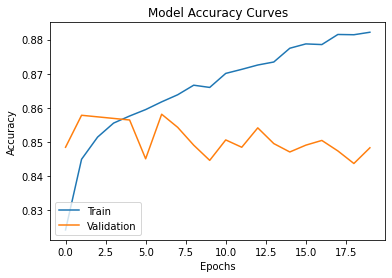

In [19]:
import matplotlib.pyplot as plt
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

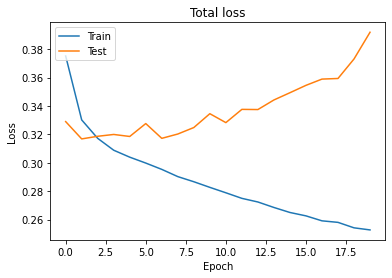

In [20]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# Part 2 Optimizing Neural Network

# Dropout Optimization

In [21]:
model = Sequential()
#from tensorflow.keras.layers import BatchNormalization, LayerNormalization
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 160)               15520     
                                                                 
 dense_4 (Dense)             (None, 160)               25760     
                                                                 
 dense_5 (Dense)             (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.4008 - accuracy: 0.8091 - val_loss: 0.3421 - val_accuracy: 0.8460
Epoch 2/20
407/407 [====================

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(26048, 96)
(6513, 96)
(26048, 2)
(6513, 2)


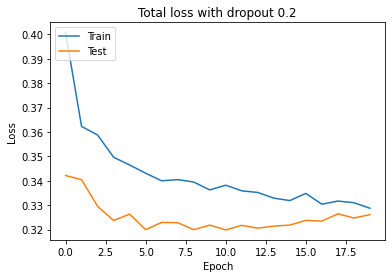

In [23]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with dropout 0.2') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

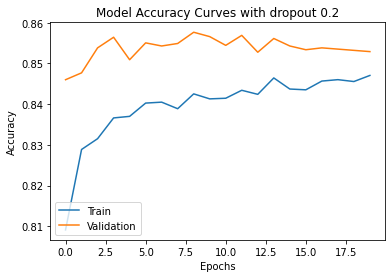

In [24]:
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with dropout 0.2')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [25]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8529


0.8529095649719238

In [26]:
model = Sequential()
#from tensorflow.keras.layers import BatchNormalization, LayerNormalization
from keras.layers import Dropout

model.add(Dropout(0.4, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_6 (Dense)             (None, 160)               15520     
                                                                 
 dense_7 (Dense)             (None, 160)               25760     
                                                                 
 dense_8 (Dense)             (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.4248 - accuracy: 0.7979 - val_loss: 0.3505 - val_accuracy: 0.8451
Epoch 2/20
407/407 [====================

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(26048, 96)
(6513, 96)
(26048, 2)
(6513, 2)


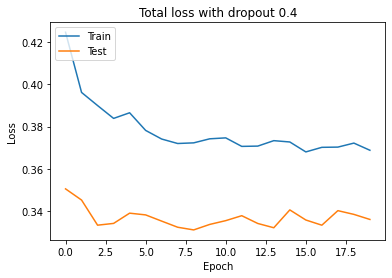

In [28]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with dropout 0.4') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

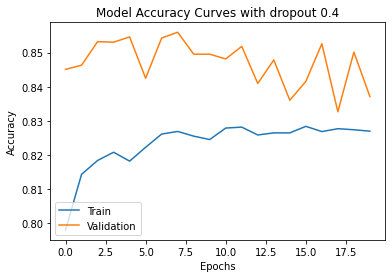

In [29]:
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with dropout 0.4')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [30]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8371


0.8370950222015381

In [31]:
model = Sequential()
#from tensorflow.keras.layers import BatchNormalization, LayerNormalization
from keras.layers import Dropout

model.add(Dropout(0.8, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_9 (Dense)             (None, 160)               15520     
                                                                 
 dense_10 (Dense)            (None, 160)               25760     
                                                                 
 dense_11 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.5089 - accuracy: 0.7622 - val_loss: 0.4358 - val_accuracy: 0.8032
Epoch 2/20
407/407 [====================

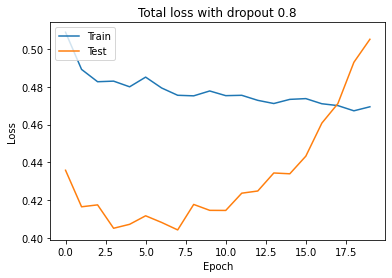

In [32]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with dropout 0.8') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

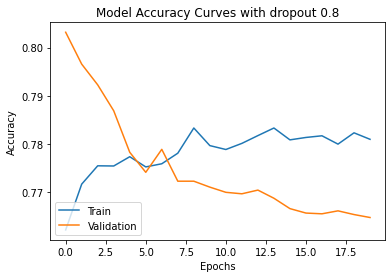

In [33]:
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with dropout 0.8')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [34]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.5052 - accuracy: 0.7648


0.7647781372070312

# If we dop 80% of the nueron the complexity of neural network decreases a lot and as a result performance takes a massive hit


# Optimizer Tuning

In [35]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_12 (Dense)            (None, 160)               15520     
                                                                 
 dense_13 (Dense)            (None, 160)               25760     
                                                                 
 dense_14 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 3s 4ms/step - loss: 0.3906 - accuracy: 0.8154 - val_loss: 0.3539 - val_accuracy: 0.8331
Epoch 2/20
407/407 [====================

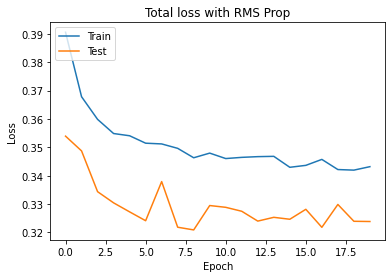

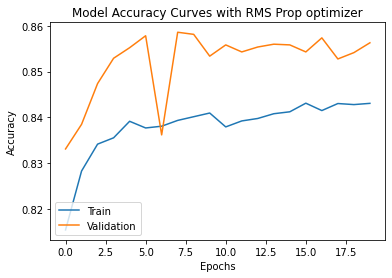

In [36]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with RMS Prop') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with RMS Prop optimizer')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [37]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.8563


0.85628741979599

#With  Stochastic Gradient Descent optimizer the the loss and accuracy graph are less jaggered and aysmtotic in terms of convergence

In [38]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 96)                0         
                                                                 
 dense_15 (Dense)            (None, 160)               15520     
                                                                 
 dense_16 (Dense)            (None, 160)               25760     
                                                                 
 dense_17 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.5690 - accuracy: 0.7517 - val_loss: 0.5058 - val_accuracy: 0.7602
Epoch 2/20
407/407 [====================

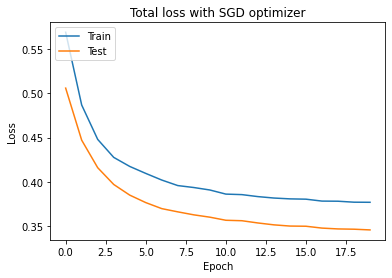

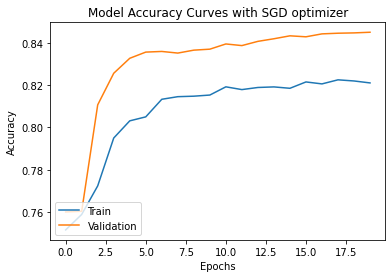

In [39]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with SGD optimizer') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with SGD optimizer')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [40]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3456 - accuracy: 0.8449


0.8449255228042603

In [41]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 96)                0         
                                                                 
 dense_18 (Dense)            (None, 160)               15520     
                                                                 
 dense_19 (Dense)            (None, 160)               25760     
                                                                 
 dense_20 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.6206 - accuracy: 0.7530 - val_loss: 0.5792 - val_accuracy: 0.7602
Epoch 2/20
407/407 [====================

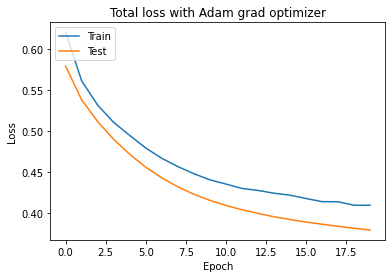

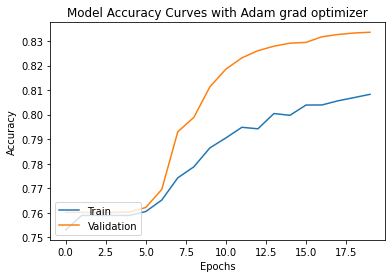

In [42]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Adam grad optimizer') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Adam grad optimizer')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [43]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3799 - accuracy: 0.8336


0.8335636258125305

# NOTE: Here above with adam grad we have exponential decay of loss or convergence

# Activation Function Tuning

In [44]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 96)                0         
                                                                 
 dense_21 (Dense)            (None, 160)               15520     
                                                                 
 dense_22 (Dense)            (None, 160)               25760     
                                                                 
 dense_23 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.5698 - accuracy: 0.7542 - val_loss: 0.5056 - val_accuracy: 0.7602
Epoch 2/20
407/407 [====================

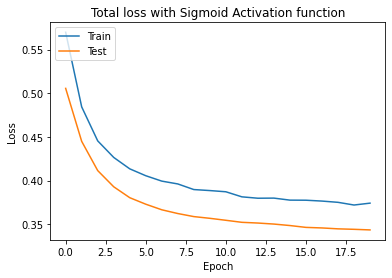

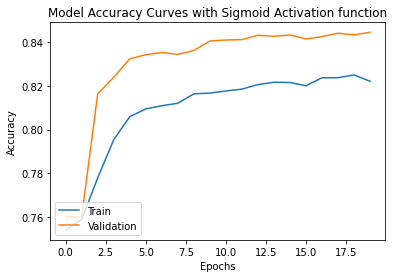

In [45]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Sigmoid Activation function') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Sigmoid Activation function')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [46]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8445


0.844464898109436

In [47]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='selu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='tanh'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_7 (Dropout)         (None, 96)                0         
                                                                 
 dense_24 (Dense)            (None, 160)               15520     
                                                                 
 dense_25 (Dense)            (None, 160)               25760     
                                                                 
 dense_26 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 3s 4ms/step - loss: 6.5900 - accuracy: 0.5923 - val_loss: 7.6246 - val_accuracy: 0.7576
Epoch 2/20
407/407 [====================

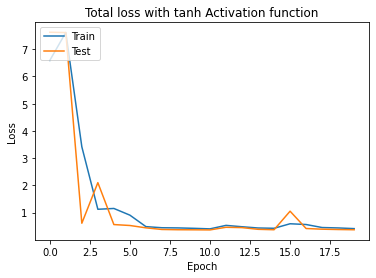

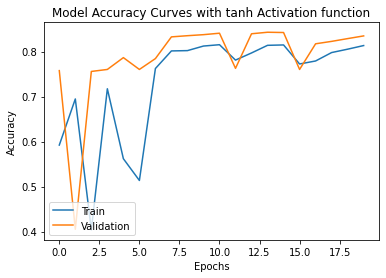

In [48]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with tanh Activation function') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with tanh Activation function')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [49]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3704 - accuracy: 0.8346


0.8346384167671204

In [83]:
#TODO
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 96)                0         
                                                                 
 dense_57 (Dense)            (None, 160)               15520     
                                                                 
 dense_58 (Dense)            (None, 160)               25760     
                                                                 
 dense_59 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 5s 8ms/step - loss: 0.5089 - accuracy: 0.7824 - val_loss: 0.4179 - val_accuracy: 0.8240
Epoch 2/20
407/407 [===================

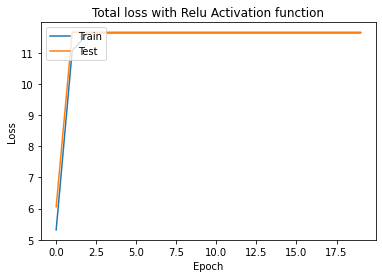

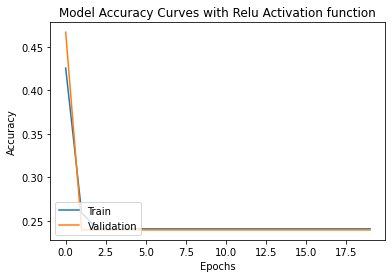

In [51]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Relu Activation function') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Relu Activation function')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [52]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 11.6588 - accuracy: 0.2398


0.23982803523540497

# Initializer Tuning

In [53]:
model = Sequential()
from keras.layers import Dropout


model.add(Dropout(0.2, input_shape=(96,)))
initializer = tf.keras.initializers.Ones()
model.add(Dense(160, input_dim=96, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_9 (Dropout)         (None, 96)                0         
                                                                 
 dense_30 (Dense)            (None, 160)               15520     
                                                                 
 dense_31 (Dense)            (None, 160)               25760     
                                                                 
 dense_32 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.7140 - accuracy: 0.7583 - val_loss: 0.4074 - val_accuracy: 0.8343
Epoch 2/20
407/407 [===================

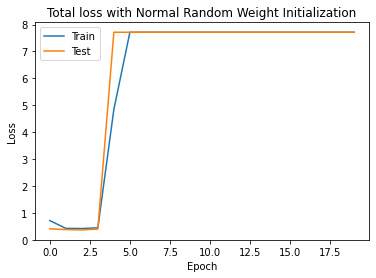

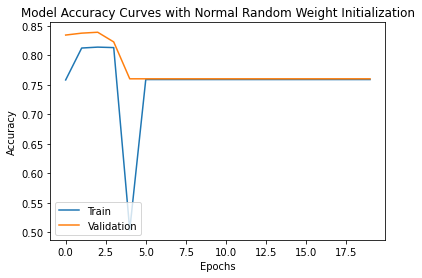

In [54]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Normal Random Weight Initialization') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Normal Random Weight Initialization')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [55]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.7602


0.7601719498634338

In [56]:
model = Sequential()
from keras.layers import Dropout


model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu',kernel_initializer='zeros'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='selu'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 96)                0         
                                                                 
 dense_33 (Dense)            (None, 160)               15520     
                                                                 
 dense_34 (Dense)            (None, 160)               25760     
                                                                 
 dense_35 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 7.7125 - accuracy: 0.7589 - val_loss: 7.7125 - val_accuracy: 0.7602
Epoch 2/20
407/407 [===================

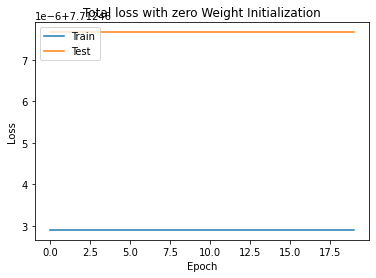

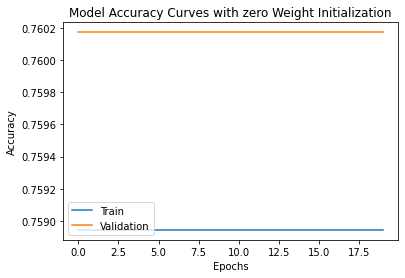

In [57]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with zero Weight Initialization') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with zero Weight Initialization')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [58]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.7602


0.7601719498634338

# NOTE: With zero initialization there is no learning as there is no gradient to be backpropogated

In [59]:
model = Sequential()
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu',kernel_initializer='ones'))
model.add(Dense(160, activation='relu',kernel_initializer='ones'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_11 (Dropout)        (None, 96)                0         
                                                                 
 dense_36 (Dense)            (None, 160)               15520     
                                                                 
 dense_37 (Dense)            (None, 160)               25760     
                                                                 
 dense_38 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 3.6971 - accuracy: 0.7589 - val_loss: 3.6783 - val_accuracy: 0.7602
Epoch 2/20
407/407 [===================

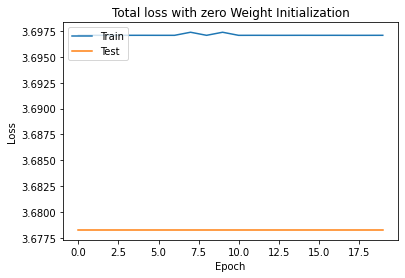

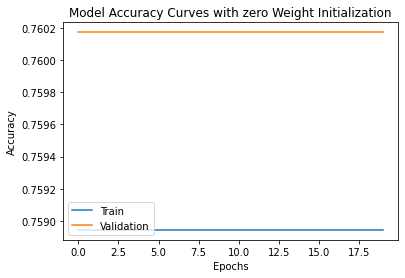

In [60]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with zero Weight Initialization') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with zero Weight Initialization')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [61]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 3.6783 - accuracy: 0.7602


0.7601719498634338

In [62]:
# After completing step2,choose a model setup that returns the best accuracy and use it as a ‘base’ model

#Base Model

In [63]:
model = Sequential()
#from tensorflow.keras.layers import BatchNormalization, LayerNormalization
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=20,
          validation_data=(X_test, Y_test))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 96)                0         
                                                                 
 dense_39 (Dense)            (None, 160)               15520     
                                                                 
 dense_40 (Dense)            (None, 160)               25760     
                                                                 
 dense_41 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
407/407 [==============================] - 2s 4ms/step - loss: 0.3975 - accuracy: 0.8101 - val_loss: 0.3407 - val_accuracy: 0.8457
Epoch 2/20
407/407 [===================

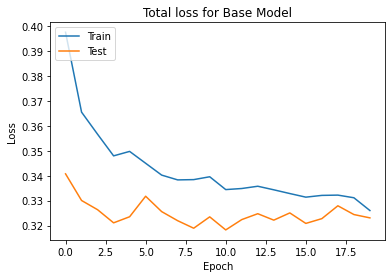

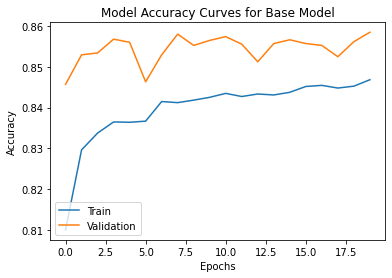

In [64]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss for Base Model') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves for Base Model')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [65]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8584


0.8584370017051697

# Early Stopping

In [66]:
model = Sequential()
#from tensorflow.keras.layers import BatchNormalization, LayerNormalization
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(Dense(160, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_13 (Dropout)        (None, 96)                0         
                                                                 
 dense_42 (Dense)            (None, 160)               15520     
                                                                 
 dense_43 (Dense)            (None, 160)               25760     
                                                                 
 dense_44 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________


In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
custom_early_stopping = EarlyStopping(monitor='val_loss', patience= 5, mode='min')

nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_test, Y_test), callbacks=[custom_early_stopping])

Epoch 1/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3945 - accuracy: 0.8151 - val_loss: 0.3430 - val_accuracy: 0.8460
Epoch 2/100
407/407 [==============================] - 1s 4ms/step - loss: 0.3646 - accuracy: 0.8278 - val_loss: 0.3293 - val_accuracy: 0.8526
Epoch 3/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3554 - accuracy: 0.8332 - val_loss: 0.3281 - val_accuracy: 0.8528
Epoch 4/100
407/407 [==============================] - 1s 4ms/step - loss: 0.3472 - accuracy: 0.8365 - val_loss: 0.3220 - val_accuracy: 0.8555
Epoch 5/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3475 - accuracy: 0.8360 - val_loss: 0.3224 - val_accuracy: 0.8574
Epoch 6/100
407/407 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8381 - val_loss: 0.3220 - val_accuracy: 0.8528
Epoch 7/100
407/407 [==============================] - 1s 4ms/step - loss: 0.3409 - accuracy: 0.8396 - val_loss: 0.3229 - val_accuracy: 0.8537

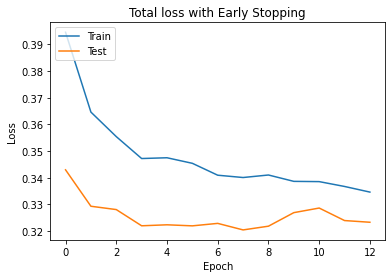

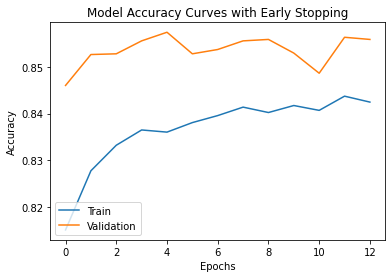

In [68]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Early Stopping') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Early Stopping')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [69]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8558


0.8558267951011658

#Regularization

In [70]:
model = Sequential()
from tensorflow.keras import regularizers
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
model.add(Dense(160, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
#model.add(BatchNormalization())
#model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 96)                0         
                                                                 
 dense_45 (Dense)            (None, 160)               15520     
                                                                 
 dense_46 (Dense)            (None, 160)               25760     
                                                                 
 dense_47 (Dense)            (None, 2)                 322       
                                                                 
Total params: 41,602
Trainable params: 41,602
Non-trainable params: 0
_________________________________________________________________


In [71]:
nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
407/407 [==============================] - 3s 5ms/step - loss: 0.4026 - accuracy: 0.8105 - val_loss: 0.3407 - val_accuracy: 0.8491
Epoch 2/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3682 - accuracy: 0.8302 - val_loss: 0.3346 - val_accuracy: 0.8501
Epoch 3/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3577 - accuracy: 0.8335 - val_loss: 0.3315 - val_accuracy: 0.8540
Epoch 4/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.8370 - val_loss: 0.3284 - val_accuracy: 0.8574
Epoch 5/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3544 - accuracy: 0.8363 - val_loss: 0.3335 - val_accuracy: 0.8517
Epoch 6/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3466 - accuracy: 0.8422 - val_loss: 0.3303 - val_accuracy: 0.8549
Epoch 7/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8408 - val_loss: 0.3306 - val_accuracy: 0.8551

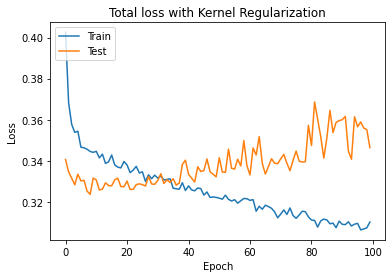

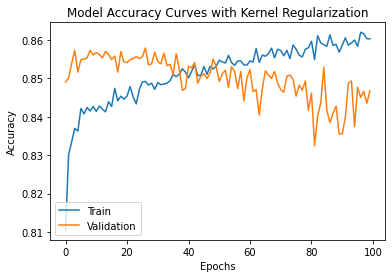

In [72]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Kernel Regularization') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Kernel Regularization')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [73]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8468


0.8467680215835571

# Batch Normalisation

In [74]:
model = Sequential()
from tensorflow.keras import regularizers
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(160, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_15 (Dropout)        (None, 96)                0         
                                                                 
 dense_48 (Dense)            (None, 160)               15520     
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dense_49 (Dense)            (None, 160)               25760     
                                                                 
 batch_normalization_1 (Batc  (None, 160)              640       
 hNormalization)                                                 
                                                                 
 dense_50 (Dense)            (None, 2)               

In [75]:
nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_test, Y_test))

Epoch 1/100
407/407 [==============================] - 3s 5ms/step - loss: 0.4290 - accuracy: 0.8013 - val_loss: 0.3674 - val_accuracy: 0.8202
Epoch 2/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3719 - accuracy: 0.8219 - val_loss: 0.3417 - val_accuracy: 0.8409
Epoch 3/100
407/407 [==============================] - 2s 5ms/step - loss: 0.3624 - accuracy: 0.8305 - val_loss: 0.3330 - val_accuracy: 0.8455
Epoch 4/100
407/407 [==============================] - 2s 5ms/step - loss: 0.3605 - accuracy: 0.8315 - val_loss: 0.3241 - val_accuracy: 0.8555
Epoch 5/100
407/407 [==============================] - 2s 5ms/step - loss: 0.3526 - accuracy: 0.8355 - val_loss: 0.3356 - val_accuracy: 0.8380
Epoch 6/100
407/407 [==============================] - 2s 4ms/step - loss: 0.3509 - accuracy: 0.8352 - val_loss: 0.3286 - val_accuracy: 0.8540
Epoch 7/100
407/407 [==============================] - 2s 5ms/step - loss: 0.3500 - accuracy: 0.8366 - val_loss: 0.3271 - val_accuracy: 0.8540

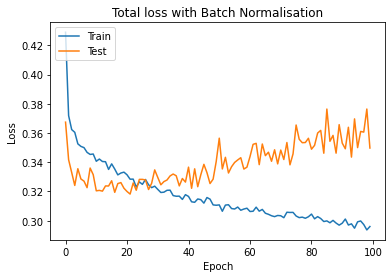

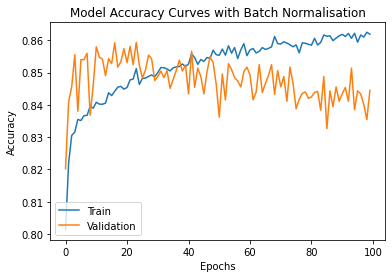

In [76]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Batch Normalisation') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Batch Normalisation')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [77]:
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8445


0.844464898109436

#Weights Checkpoint

In [78]:
model = Sequential()
from tensorflow.keras import regularizers
from keras.layers import Dropout

model.add(Dropout(0.2, input_shape=(96,)))
model.add(Dense(160, input_dim=96, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(160, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_16 (Dropout)        (None, 96)                0         
                                                                 
 dense_51 (Dense)            (None, 160)               15520     
                                                                 
 batch_normalization_2 (Batc  (None, 160)              640       
 hNormalization)                                                 
                                                                 
 dense_52 (Dense)            (None, 160)               25760     
                                                                 
 batch_normalization_3 (Batc  (None, 160)              640       
 hNormalization)                                                 
                                                                 
 dense_53 (Dense)            (None, 2)               

In [79]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint = ModelCheckpoint(
    checkpoint_filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='max',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None,
)
nn_history = model.fit(X_train, Y_train,
          batch_size=64, epochs=100,
          validation_data=(X_test, Y_test), callbacks=[model_checkpoint, custom_early_stopping])

Epoch 1/100
407/407 [==============================] - 4s 9ms/step - loss: 0.4287 - accuracy: 0.8024 - val_loss: 0.3505 - val_accuracy: 0.8394
Epoch 2/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3704 - accuracy: 0.8270 - val_loss: 0.3365 - val_accuracy: 0.8446
Epoch 3/100
407/407 [==============================] - 3s 9ms/step - loss: 0.3621 - accuracy: 0.8298 - val_loss: 0.3293 - val_accuracy: 0.8543
Epoch 4/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3578 - accuracy: 0.8323 - val_loss: 0.3281 - val_accuracy: 0.8498
Epoch 5/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3531 - accuracy: 0.8349 - val_loss: 0.3244 - val_accuracy: 0.8557
Epoch 6/100
407/407 [==============================] - 3s 8ms/step - loss: 0.3507 - accuracy: 0.8369 - val_loss: 0.3250 - val_accuracy: 0.8540
Epoch 7/100
407/407 [==============================] - 3s 9ms/step - loss: 0.3504 - accuracy: 0.8360 - val_loss: 0.3232 - val_accuracy: 0.8551

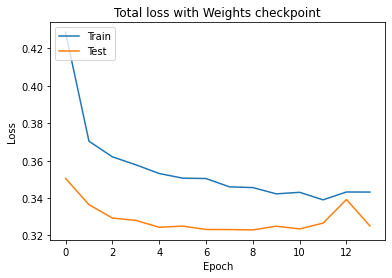

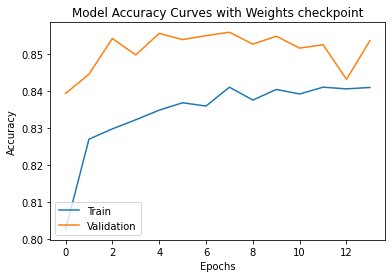

In [80]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total loss with Weights checkpoint') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curves with Weights checkpoint')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

In [81]:
model.load_weights(checkpoint_filepath)
model.evaluate(X_test, Y_test)[1]

204/204 [==============================] - 1s 3ms/step - loss: 0.3251 - accuracy: 0.8537


0.8536772727966309

# References
1) https://keras.io/api/ <br>
2) https://keras.io/api/models/sequential/ <br>
3) https://numpy.org/ <br>
4) https://keras.io/api/models/model_training_apis/#fit-method <br>
5) https://keras.io/api/callbacks/model_checkpoint/ <br>
6) https://keras.io/api/optimizers/ <br>
7) https://keras.io/api/layers/activations/ <br>
8) https://keras.io/api/callbacks/early_stopping/ <br>